In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('cancer_patient.csv')
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
data.tail()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
999,999,P999,47,1,6,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High


In [ ]:
data.shape

(1000, 26)

In [ ]:
data.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [ ]:
data.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [ ]:
def unique(i):
    print("{}".format(i))
    print(data[i].nunique())
    print("-"*50)

for i in data.select_dtypes(exclude="object"):
    unique(i)

index
1000
--------------------------------------------------
Age
40
--------------------------------------------------
Gender
2
--------------------------------------------------
Air Pollution
8
--------------------------------------------------
Alcohol use
8
--------------------------------------------------
Dust Allergy
8
--------------------------------------------------
OccuPational Hazards
8
--------------------------------------------------
Genetic Risk
7
--------------------------------------------------
chronic Lung Disease
7
--------------------------------------------------
Balanced Diet
7
--------------------------------------------------
Obesity
7
--------------------------------------------------
Smoking
8
--------------------------------------------------
Passive Smoker
8
--------------------------------------------------
Chest Pain
9
--------------------------------------------------
Coughing of Blood
9
--------------------------------------------------
Fatigue
8
------

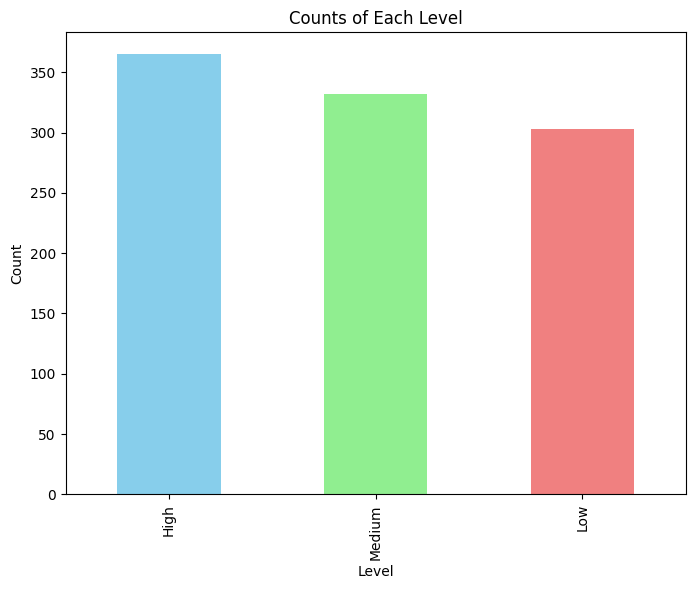

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Assuming 'Level' is the column you want to represent in the bar graph
level_counts = data['Level'].value_counts()

# Create a bar graph
plt.figure(figsize=(8, 6))
level_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Counts of Each Level')
plt.xlabel('Level')
plt.ylabel('Count')
plt.show()


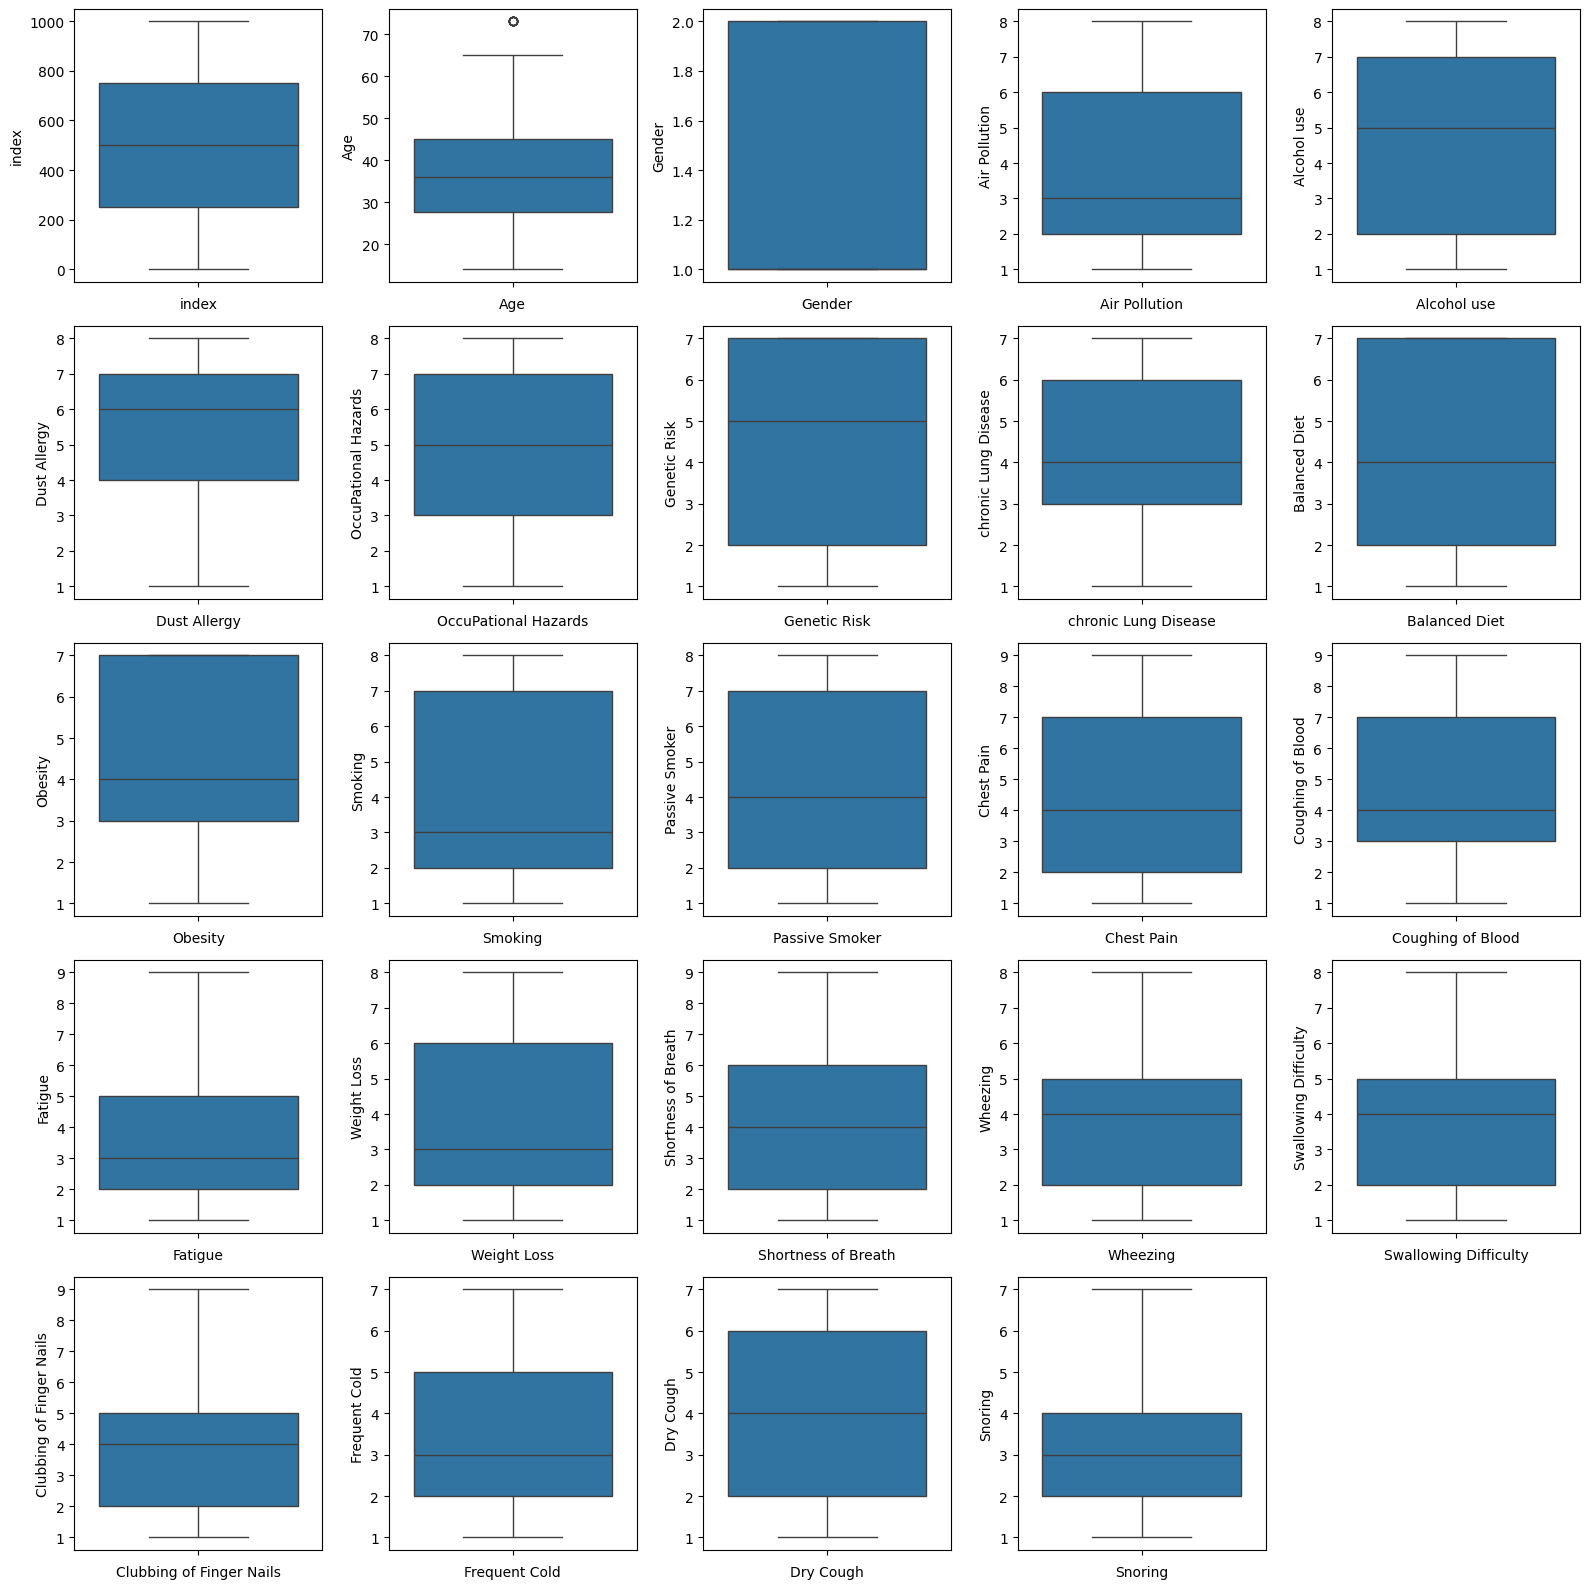

In [ ]:
plt.figure(figsize = (16,16))

for i,j in enumerate(data.select_dtypes(include = "number").columns):

    plt.subplot(5,5,i+1)

    sns.boxplot(data[j])
    plt.xlabel("{}".format(j))

    plt.tight_layout()

plt.subplots_adjust()
plt.show()


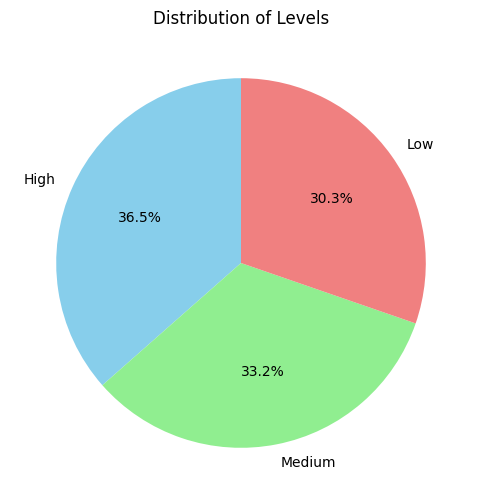

In [ ]:
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(level_counts, labels=level_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Levels')
plt.show()

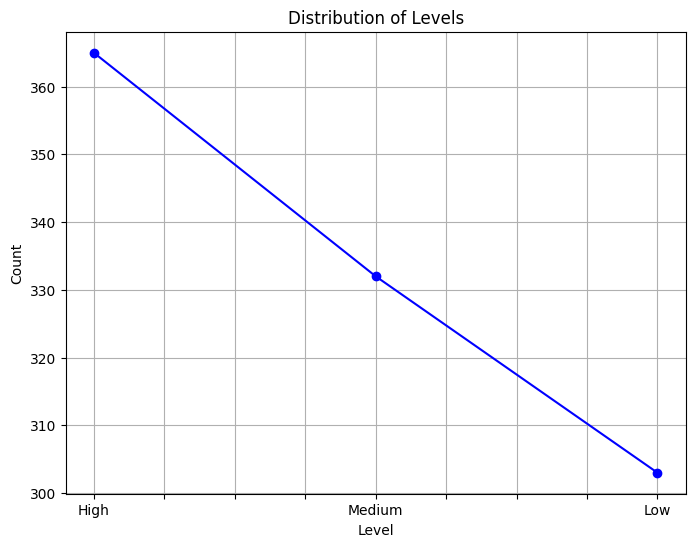

In [ ]:
# Create a line plot
plt.figure(figsize=(8, 6))
level_counts.plot(kind='line', marker='o', color='b')
plt.title('Distribution of Levels')
plt.xlabel('Level')
plt.ylabel('Count')
plt.grid(True)
plt.show()


In [ ]:
# Assuming 'Level' is the target variable
X = data.drop(['Patient Id', 'Level'], axis=1)  # Features
y = data['Level']  # Target variable

# Encode categorical variables (if any)
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForestClassifier model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [ ]:
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       1.00      1.00      1.00        55
      Medium       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

